In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# https://www.kaggle.com/arjunprasadsarkhel/2021-olympics-in-tokyo/code

In [4]:
athletes = pd.read_excel("drive/MyDrive/Collab DataSets/OlympicsAthletes.xlsx")
coaches = pd.read_excel("drive/MyDrive/Collab DataSets/OlympicsCoaches.xlsx")
gender = pd.read_excel("drive/MyDrive/Collab DataSets/OlympicsEntriesGender.xlsx")
medals = pd.read_excel("drive/MyDrive/Collab DataSets/OlympicsMedals.xlsx")
teams = pd.read_excel("drive/MyDrive/Collab DataSets/OlympicsTeams.xlsx")

In [45]:
dff = {
    "Athletes" : athletes,
    "Coaches" : coaches,
    "Gender" : gender,
    "Medals" : medals,
    "Teams" : teams
}

for key, value in dff.items():
  print(f"___________________________________{key}________________________________________",end="")
  for i in range(8 - len(key)):
    print("_",end="")
  print()
  print()
  print("Little Overview Of Data:")
  print(value.head(5))
  rows , columns = value.shape
  print()
  print(f"Total Rows Are {rows}, and Columns Are {columns}")
  print()


___________________________________Athletes________________________________________

Little Overview Of Data:
                Name     NOC           Discipline
0    AALERUD Katrine  Norway         Cycling Road
1        ABAD Nestor   Spain  Artistic Gymnastics
2  ABAGNALE Giovanni   Italy               Rowing
3     ABALDE Alberto   Spain           Basketball
4      ABALDE Tamara   Spain           Basketball

Total Rows Are 11085, and Columns Are 3

___________________________________Coaches_________________________________________

Little Overview Of Data:
              Name            NOC  Discipline Event
0  ABDELMAGID Wael          Egypt    Football   NaN
1        ABE Junya          Japan  Volleyball   NaN
2    ABE Katsuhiko          Japan  Basketball   NaN
3     ADAMA Cherif  Côte d'Ivoire    Football   NaN
4       AGEBA Yuya          Japan  Volleyball   NaN

Total Rows Are 394, and Columns Are 4

___________________________________Gender__________________________________________

L

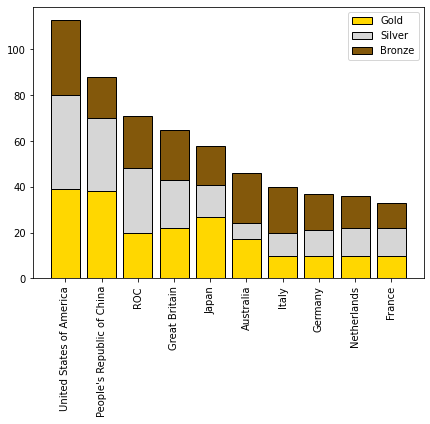

In [10]:
medal = medals.sort_values(by="Total", ascending=False)
plt.figure(figsize=[7,5])
plt.bar(medal.iloc[:10,1], medal.iloc[:10,2],color="#FFD700", edgecolor="black")
plt.bar(medal.iloc[:10,1], medal.iloc[:10,3], bottom=medal.iloc[:10,2], color = "#d6d6d6", edgecolor="black")
plt.bar(medal.iloc[:10,1], medal.iloc[:10,4], bottom=medal.iloc[:10,2]+medal.iloc[:10,3], color="#83580b", edgecolor="black")
plt.xticks(medal.iloc[:10,1], rotation="vertical")
plt.legend(["Gold", "Silver", "Bronze"])

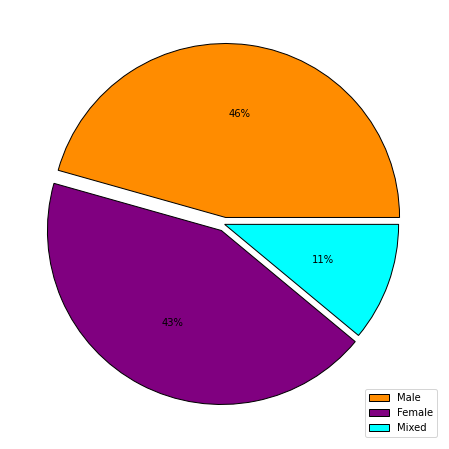

In [11]:
male = teams.Event == "Men"
male = male.sum()
female = teams.Event == "Women"
female = female.sum()
others = teams.Event == "Mixed Team"
others = others.sum()

explode = [0.04, 0.04, 0.0]
plt.figure(figsize=[10,8])
plt.pie([male, female, others],colors= ["darkorange", "purple", "cyan"], explode=explode,autopct='%1.0f%%',
        wedgeprops = 
        {"edgecolor" : "black",
                      'linewidth': 1,
                      'antialiased': True})
plt.legend(["Male", "Female", "Mixed"])

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

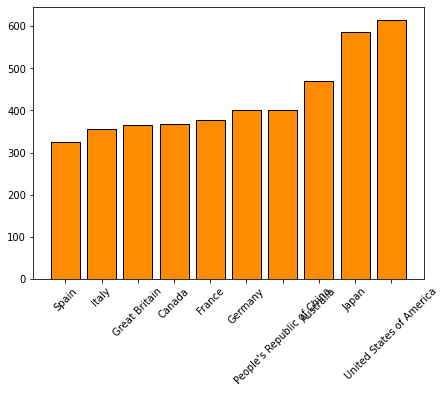

In [12]:
athle = athletes.groupby("NOC").groups

country_counts = {}

for key, value in sorted(athle.items()):
  country_counts[key] = len(value)
  sorted_list = sorted(country_counts.items(), key =
             lambda kv:(kv[1], kv[0]))
req_list = sorted_list[-10:]
x= []
y= []

for rows in req_list:
  x.append(rows[0])
  y.append(rows[1])
plt.figure(figsize=(7,5))
plt.bar(x, y, color="darkorange", edgecolor="black")
plt.xticks(rotation=45)

In [13]:
gender.head()

,Discipline,Female,Male,Total
0,3x3 Basketball,32,32,64
1,Archery,64,64,128
2,Artistic Gymnastics,98,98,196
3,Artistic Swimming,105,0,105
4,Athletics,969,1072,2041


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

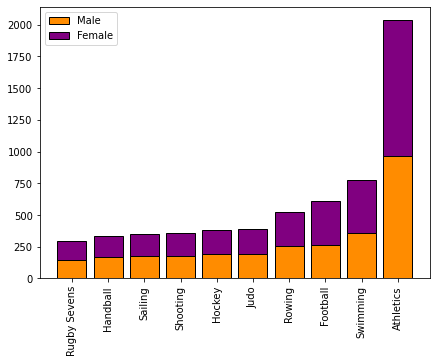

In [14]:
sortgen = gender.sort_values(by="Total", ascending="True")

plt.figure(figsize=[7, 5])
plt.bar(x = sortgen.iloc[-10:, 0], height=sortgen.iloc[-10:, 1], color = "darkorange", edgecolor="black")
plt.bar(x = sortgen.iloc[-10:, 0], height=sortgen.iloc[-10:, 2], bottom= sortgen.iloc[-10:,1], color = "purple", edgecolor="black")
plt.legend(["Male", "Female"])
plt.xticks(rotation = 90)

In [15]:
coaches.head()

,Name,NOC,Discipline,Event
0,ABDELMAGID Wael,Egypt,Football,NaN
1,ABE Junya,Japan,Volleyball,NaN
2,ABE Katsuhiko,Japan,Basketball,NaN
3,ADAMA Cherif,Côte d'Ivoire,Football,NaN
4,AGEBA Yuya,Japan,Volleyball,NaN


In [16]:
teams.head()

,Name,Discipline,NOC,Event
0,Belgium,3x3 Basketball,Belgium,Men
1,China,3x3 Basketball,People's Republic of China,Men
2,China,3x3 Basketball,People's Republic of China,Women
3,France,3x3 Basketball,France,Women
4,Italy,3x3 Basketball,Italy,Women


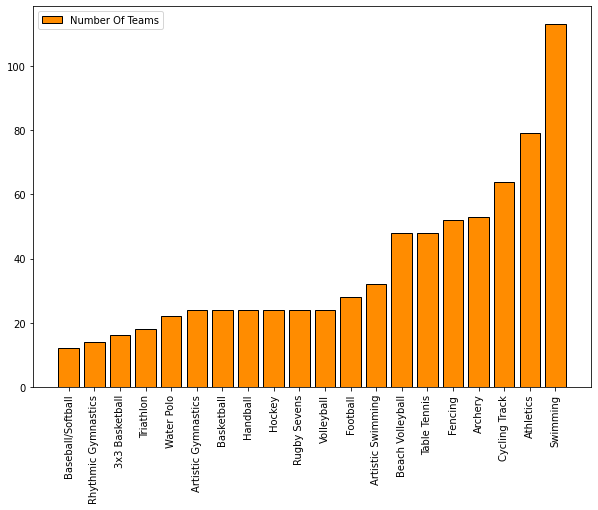

In [17]:
team_distribution = teams.groupby(by="Discipline").groups

td = {}
for keys, values in team_distribution.items():
  td[keys] = len(values)

sorted_team = sorted(td.items(), key = lambda kv:(kv[1],kv[0]))

xt = []
yt = []

for i in sorted_team:
  xt.append(i[0])
  yt.append(i[1])

plt.figure(figsize = [10, 7])
plt.bar(xt, yt, color = "darkorange", edgecolor="black")
plt.xticks(rotation = 90)
plt.legend(["Number Of Teams"])

In [18]:
gender.head()
no_male = gender.Male.sum()
no_female = gender.Female.sum()

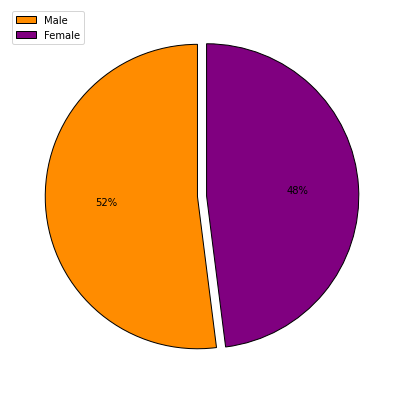

In [19]:
explode = (0, 0.06)
plt.figure(figsize=[10, 7])
plt.pie([no_male, no_female], startangle=90,explode= explode , autopct='%1.0f%%',colors=["darkorange", "Purple"], wedgeprops = 
        {"edgecolor" : "black",
                      'linewidth': 1,
                      'antialiased': True})
plt.legend(["Male", "Female"])